<a href="https://colab.research.google.com/github/HHansi/Applied-AI-Course/blob/main/Time%20Series%20Analysis/ChangePoints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Changepoints**

This notebook contains practical examples and exercises for the Applied AI-Time Series - Changepoints topic. It is adapted from [this tutorial](https://medium.com/dataman-in-ai/finding-the-change-points-in-a-time-series-95a308207012).

Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

Generate a random pandas time series.

In [ ]:
# Set the random seed for reproducibility
np.random.seed(42)

# Generate a random time series with 1000 data points
signal = pd.Series(np.random.normal(0, 1, 1000), index=pd.date_range('2022-01-01', periods=1000, freq='D'))

# Add some abrupt changes to the time series
signal.loc['2022-02-05':'2022-02-15'] -= 5
signal.loc['2022-03-10':'2022-03-20'] += 3.5
signal.loc['2022-04-05':'2022-04-08'] -= 4

Let's generate a graphical representation of the result.

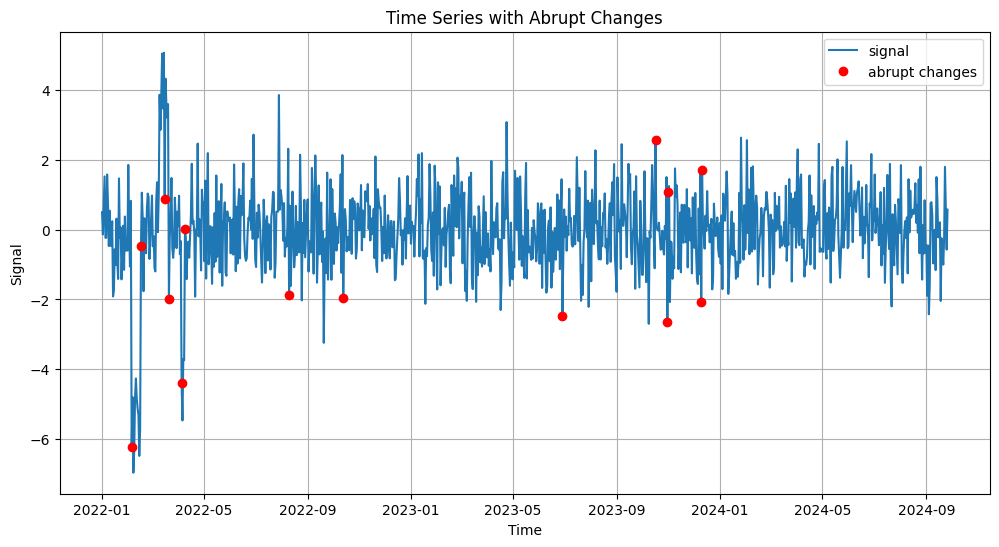

In [ ]:
# Plot the time series
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(signal, label='signal')

# Plot the abrupt changes
abrupt_changes = detect_abrupt_changes(signal, 0.3, 10)
abrupt_changes = abrupt_changes.astype(int)
ax.plot(signal[abrupt_changes==1], 'ro', label='abrupt changes')

# Add labels, grid, and legend
ax.set_xlabel('Time')
ax.set_ylabel('Signal')
ax.set_title('Time Series with Abrupt Changes')
ax.legend()
ax.grid(True)

# Show the plot
plt.show()

# **Generate Two Time Series**

*   The first time series “ts1”: Has ten data segments with constant variance.
*   The second time series “ts2”: has ten data segments but with varying variances.

**Offline — The Ruptures Module**

In time series modeling we try to find the underlying pattern such as a regression line so we can forecast the future. But the regression line will not be straight if there are change points. So an intuitive algorithm is to build segmented regression lines where the kinked points are the change points. This method is called Pruned Exact Linear Time (PELT) [3], [4].

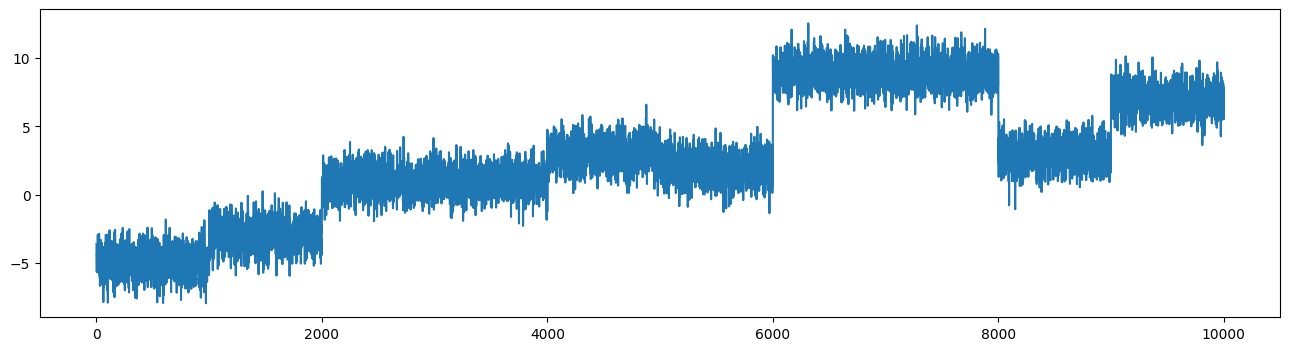

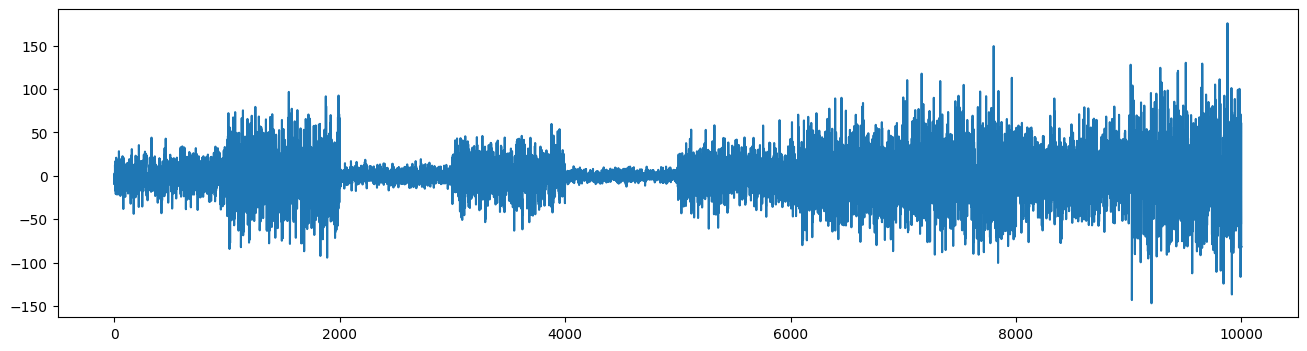

In [ ]:
# Example 1: contant variance
ts1 = []
mu, sigma, seg = 0.0, 1.0, 1000
for i in range(10):
    ts = np.random.normal(mu, sigma, seg) + np.random.randint(low=-10, high=10)
    ts1 = np.append(ts1,ts, axis=0)

plt.figure(figsize=(16,4))
plt.plot(ts1)

# Example 2: varying variance
ts2 = []
mu, sigma, seg = 0.0, 1.0, 1000
for i in range(10):
    sig = np.random.randint(low=1, high=50)
    ts = np.random.normal(mu, sigma * sig, seg)
    ts2 = np.append(ts2,ts, axis=0)

plt.figure(figsize=(16,4))
plt.plot(ts2)


**1.   Example E.1 — constant variance**







     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 9.0 MB/s eta 0:00:00


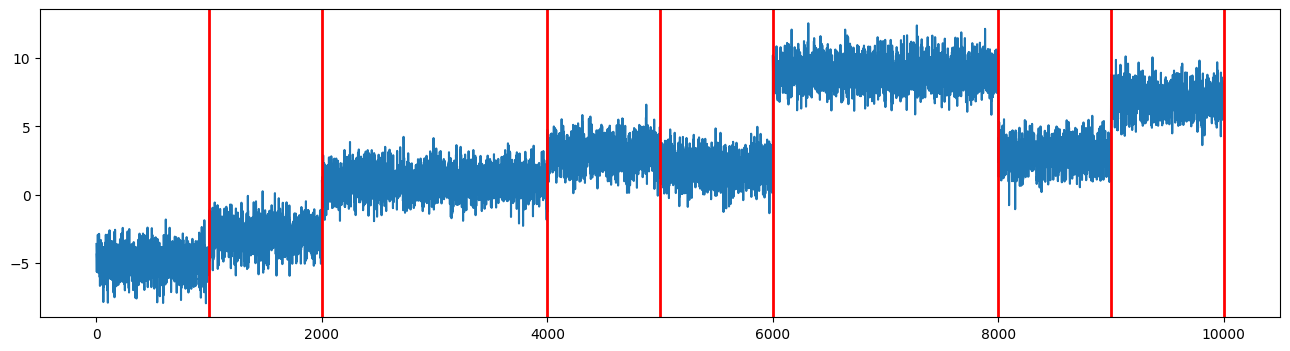

In [ ]:
!pip install ruptures
import ruptures as rpt

# Detect the change points
algo1 = rpt.Pelt(model="rbf").fit(ts1)
change_location1 = algo1.predict(pen=10)

# Point the change points:
def plot_change_points(ts,ts_change_loc):
    plt.figure(figsize=(16,4))
    plt.plot(ts)
    for x in ts_change_loc:
        plt.axvline(x,lw=2, color='red')

plot_change_points(ts1,change_location1)

This is nice. It has detected all the ten change points that we have generated. Let’s see if it is still effective when the variance varies over time.


**2.   Example E.2 —varying variance**



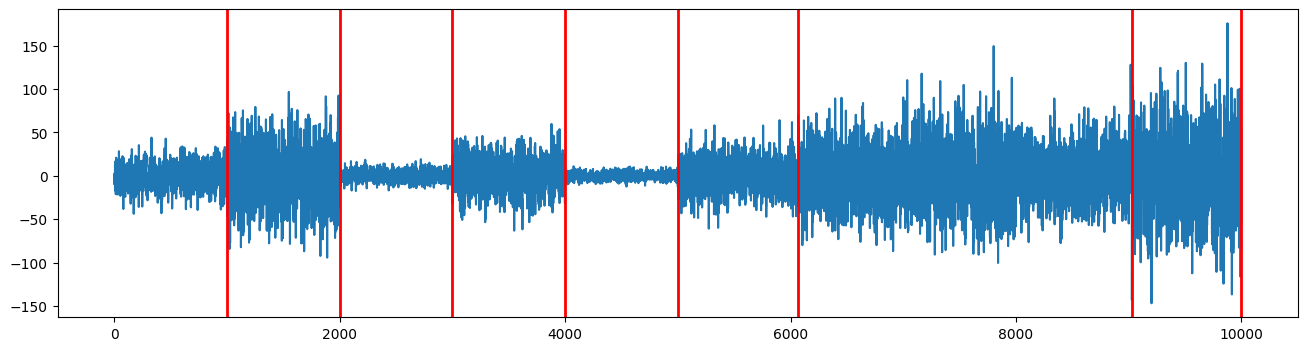

In [ ]:
# detect the change points #
algo2 = rpt.Pelt(model="rbf").fit(ts2)
change_location2 = algo2.predict(pen=10)
change_location2

# Plot the change points #
plot_change_points(ts2,change_location2)

The algorithm needs a long runtime to find the change points in Example 1.1 and especially Example 1.2. This may not meet the requirement for real-time streaming data. Therefore the Python module [“changefinder”](https://https://medium.com/dataman-in-ai/finding-the-change-points-in-a-time-series-95a308207012) is designed for real-time applications.